<a href="https://colab.research.google.com/github/HarshNVyas/ML-Algorithms-Pipeline/blob/main/Canadian_Immigration_Data_Semi_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

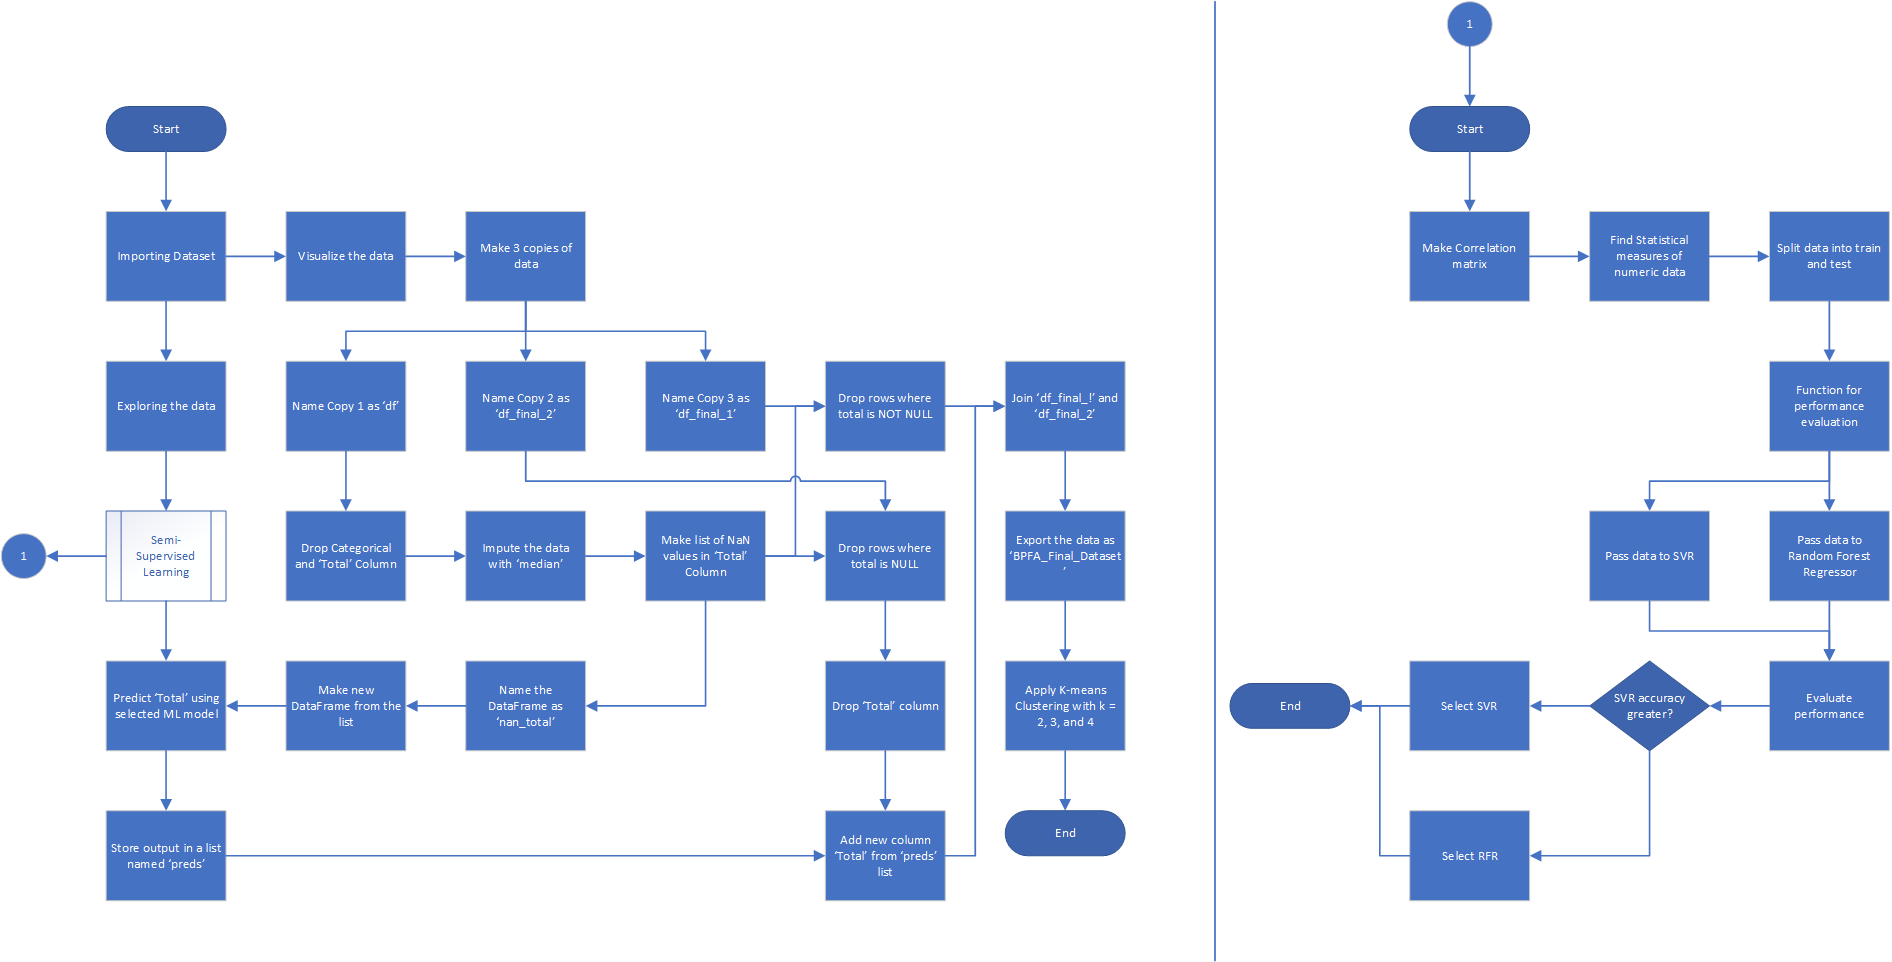

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

## importing data

In [ ]:
missing_values = ['-']
df = pd.read_csv('/content/drive/MyDrive/Colab/Models/BPFA/BPFA_Assignment.csv',na_values=missing_values)
df.head(10)

,Month,Prov,Immig,Char,Sex,Age,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,Mar-06,Canada,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Mar-06,Canada,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Mar-06,Canada,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Mar-06,Canada,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Mar-06,Canada,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1
5,Mar-06,Canada,Total,Population,Male,15 Years +,12783.1,6561.2,3184.0,2431.4,945.7,6221.8,3799.7,558.3,3241.4,2422.1,1563.3,858.8
6,Mar-06,Canada,Total,Population,Male,15-24,2213.7,1793.6,966.3,468.9,358.4,420.1,330.3,19.9,310.4,89.8,78.7,11.1
7,Mar-06,Canada,Total,Population,Male,25 Years +,10569.4,4767.7,2217.7,1962.5,587.4,5801.7,3469.4,538.3,2931.0,2332.3,1484.6,847.8
8,Mar-06,Canada,Total,Population,Male,25-64,8798.0,3660.3,1417.2,1707.1,536.0,5137.8,3062.4,379.7,2682.6,2075.4,1345.2,730.2
9,Mar-06,Canada,Total,Population,Male,55 Years +,3534.4,1914.8,1231.3,550.9,132.6,1619.6,979.1,284.9,694.3,640.4,362.7,277.8


## Study of raw data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424800 entries, 0 to 424799
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Month   424800 non-null  object 
 1   Prov    424800 non-null  object 
 2   Immig   424800 non-null  object 
 3   Char    424800 non-null  object 
 4   Sex     424800 non-null  object 
 5   Age     424800 non-null  object 
 6   Total   424635 non-null  float64
 7   NPSE    423722 non-null  float64
 8   NDCD    420091 non-null  float64
 9   HSG     421480 non-null  float64
 10  HSGSPS  408803 non-null  float64
 11    PSE   423834 non-null  float64
 12  PSCOD   421094 non-null  float64
 13  WOHSG   348111 non-null  float64
 14  WSHG    420704 non-null  float64
 15  UD      421540 non-null  float64
 16  BD      419932 non-null  float64
 17  ABD     400231 non-null  float64
dtypes: float64(12), object(6)
memory usage: 58.3+ MB


In [ ]:
df.isna().sum()

Month         0
Prov          0
Immig         0
Char          0
Sex           0
Age           0
Total       165
NPSE       1078
NDCD       4709
HSG        3320
HSGSPS    15997
  PSE       966
PSCOD      3706
WOHSG     76689
WSHG       4096
UD         3260
BD         4868
ABD       24569
dtype: int64

In [ ]:
data = df.copy()
data.head()

,Month,Prov,Immig,Char,Sex,Age,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,Mar-06,Canada,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Mar-06,Canada,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Mar-06,Canada,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Mar-06,Canada,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Mar-06,Canada,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [ ]:
data.isna().sum()

Month         0
Prov          0
Immig         0
Char          0
Sex           0
Age           0
Total       165
NPSE       1078
NDCD       4709
HSG        3320
HSGSPS    15997
  PSE       966
PSCOD      3706
WOHSG     76689
WSHG       4096
UD         3260
BD         4868
ABD       24569
dtype: int64

## Imputing missing values with Regression ML Algorithm

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339538 entries, 0 to 424799
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Month   339538 non-null  object 
 1   Prov    339538 non-null  object 
 2   Immig   339538 non-null  object 
 3   Char    339538 non-null  object 
 4   Sex     339538 non-null  object 
 5   Age     339538 non-null  object 
 6   Total   339538 non-null  float64
 7   NPSE    339538 non-null  float64
 8   NDCD    339538 non-null  float64
 9   HSG     339538 non-null  float64
 10  HSGSPS  339538 non-null  float64
 11    PSE   339538 non-null  float64
 12  PSCOD   339538 non-null  float64
 13  WOHSG   339538 non-null  float64
 14  WSHG    339538 non-null  float64
 15  UD      339538 non-null  float64
 16  BD      339538 non-null  float64
 17  ABD     339538 non-null  float64
dtypes: float64(12), object(6)
memory usage: 49.2+ MB


In [ ]:
labels = data.columns.values.tolist()
del labels[0:6]
labels

['Total',
 'NPSE',
 'NDCD',
 'HSG',
 'HSGSPS',
 '  PSE',
 'PSCOD',
 'WOHSG',
 'WSHG',
 'UD',
 'BD',
 'ABD']

### Correlation Matrix

In [ ]:
corr_matrix = np.zeros(shape=(12,12))
count_1 = 0
count_2 = 0

for i in labels:
  for j in labels:
    corr_matrix[count_1,count_2] = round(data[i].corr(data[j]),2)
    count_2+=1
  count_1+=1
  count_2=0

In [ ]:
correlation = pd.DataFrame(corr_matrix, columns=labels)
correlation['columns'] = labels
correlation

,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD,columns
0,1.00,0.97,0.87,0.99,0.92,0.99,0.99,0.87,0.99,0.96,0.97,0.94,Total
1,0.97,1.00,0.96,0.98,0.94,0.92,0.94,0.90,0.93,0.87,0.88,0.84,NPSE
2,0.87,0.96,1.00,0.89,0.87,0.79,0.81,0.88,0.80,0.73,0.74,0.71,NDCD
3,0.99,0.98,0.89,1.00,0.94,0.97,0.98,0.89,0.98,0.94,0.95,0.91,HSG
4,0.92,0.94,0.87,0.94,1.00,0.88,0.91,0.85,0.90,0.84,0.85,0.81,HSGSPS
5,0.99,0.92,0.79,0.97,0.88,1.00,0.99,0.84,0.99,0.99,0.99,0.97,PSE
6,0.99,0.94,0.81,0.98,0.91,0.99,1.00,0.87,1.00,0.96,0.97,0.94,PSCOD
7,0.87,0.90,0.88,0.89,0.85,0.84,0.87,1.00,0.86,0.78,0.79,0.78,WOHSG
8,0.99,0.93,0.80,0.98,0.90,0.99,1.00,0.86,1.00,0.97,0.97,0.94,WSHG
9,0.96,0.87,0.73,0.94,0.84,0.99,0.96,0.78,0.97,1.00,1.00,0.99,UD


In [ ]:
data_model = data[labels].copy()
data_model.head()

,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [ ]:
data_model.describe()

,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
count,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000,339538.000000
mean,1026.068697,414.449541,156.676898,212.729745,68.327102,624.794615,340.059719,34.123098,315.410357,300.091538,204.133769,111.001243
std,2345.138025,937.934321,370.700939,458.121966,131.714272,1448.424928,822.189209,70.882701,757.607158,633.884313,427.735964,203.223734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.900000,32.500000,13.700000,21.100000,7.900000,47.400000,26.100000,0.000000,24.700000,32.000000,21.300000,9.300000
50%,152.300000,67.100000,36.000000,59.000000,33.200000,89.300000,72.400000,8.800000,72.500000,77.700000,71.200000,54.000000
75%,919.800000,388.400000,122.600000,187.375000,69.300000,498.400000,253.500000,41.400000,233.900000,243.200000,157.300000,91.700000
max,31250.500000,13511.200000,6495.800000,6179.600000,2073.900000,18741.500000,9971.700000,949.300000,9238.700000,8914.500000,6071.000000,2843.500000


### Spliting The Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X=data_model.drop('Total', axis=1)
y=data_model['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((271630, 11), (67908, 11), (271630,), (67908,))

In [ ]:
X_train.head()

,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
209670,46.4,30.7,56.0,65.3,70.2,66.1,42.0,68.2,74.3,74.9,73.3
3239,5.7,2.5,2.9,0.0,7.0,5.3,0.0,4.5,1.7,0.0,0.0
35090,52.7,36.6,64.4,66.1,72.4,67.0,44.1,70.1,77.1,77.6,76.4
250607,5.2,0.0,5.5,0.0,5.5,3.9,0.0,3.6,6.5,6.0,7.2
16925,64.7,51.9,77.0,75.2,81.3,80.5,59.9,84.0,82.6,83.3,81.3


Metrics for evaluation of performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, pred):
  mse = mean_squared_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"R-squared (R2) Score: {r2*100:.2f} %")
  return mse, mae, r2

### Algorithm 1: Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

model_1 = SVR(verbose=2).fit(X_train, y_train)

[LibSVM]

In [ ]:
model_1_matrix = evaluate(y_test, model_1.predict(X_test))

Mean Squared Error (MSE): 1742605.54
Mean Absolute Error (MAE): 196.17
R-squared (R2) Score: 67.38 %


### Algorithm 2: Random Forest Regressor (RFR)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor(verbose=2).fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  2.2min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

In [ ]:
model_2_matrix = evaluate(y_test, model_2.predict(X_test))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.3s


Mean Squared Error (MSE): 360.68
Mean Absolute Error (MAE): 3.14
R-squared (R2) Score: 99.99 %


### Ploting the metrics

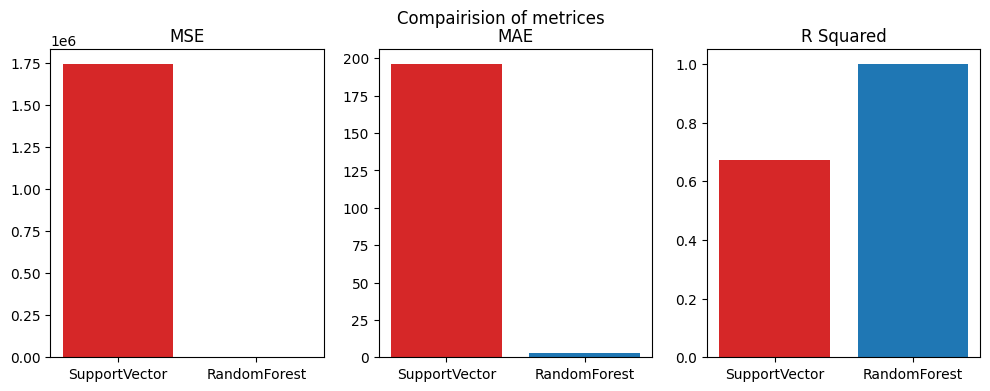

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

metrics = pd.DataFrame({'SupportVector': model_1_matrix,
                        'RandomForest': model_2_matrix})

# List of metrics
metrics_list = ['MSE', 'MAE', 'R Squared']

# Plot each metric separately
plt.figure(figsize=(12, 4))
plt.suptitle('Compairision of metrices')
plt.subplot(131)
plt.bar(['SupportVector','RandomForest'], metrics.iloc[0], color=['tab:red', 'tab:blue'])
plt.title('MSE')

plt.subplot(132)
plt.bar(['SupportVector','RandomForest'], metrics.iloc[1], color=['tab:red', 'tab:blue'])
plt.title('MAE')

plt.subplot(133)
plt.bar(['SupportVector','RandomForest'], metrics.iloc[2], color=['tab:red', 'tab:blue'])
plt.title('R Squared')

# Show the plots
plt.show()

In [ ]:
metrics

,SupportVector,RandomForest
0,1.742606e+06,360.675468
1,1.961711e+02,3.144445
2,6.737538e-01,0.999932


## Saving the models

In [ ]:
from joblib import dump,load
dump(model_1,'SVR_BPFA.joblib')
dump(model_2,'RF_BPFA.joblib')

['SVR_BPFA.joblib']

In [ ]:
from joblib import load
model_1 = load(filename='/content/drive/MyDrive/Colab/Models/BPFA/SVR_BPFA.joblib')
model_2 = load(filename='/content/drive/MyDrive/Colab/Models/BPFA/RF_BPFA.joblib')

## Imputing using Column Transformer

In [ ]:
df.head()

,Month,Prov,Immig,Char,Sex,Age,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,Mar-06,Canada,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Mar-06,Canada,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Mar-06,Canada,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Mar-06,Canada,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Mar-06,Canada,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [ ]:
df.isna().sum()

Month         0
Prov          0
Immig         0
Char          0
Sex           0
Age           0
Total       165
NPSE       1078
NDCD       4709
HSG        3320
HSGSPS    15997
  PSE       966
PSCOD      3706
WOHSG     76689
WSHG       4096
UD         3260
BD         4868
ABD       24569
dtype: int64

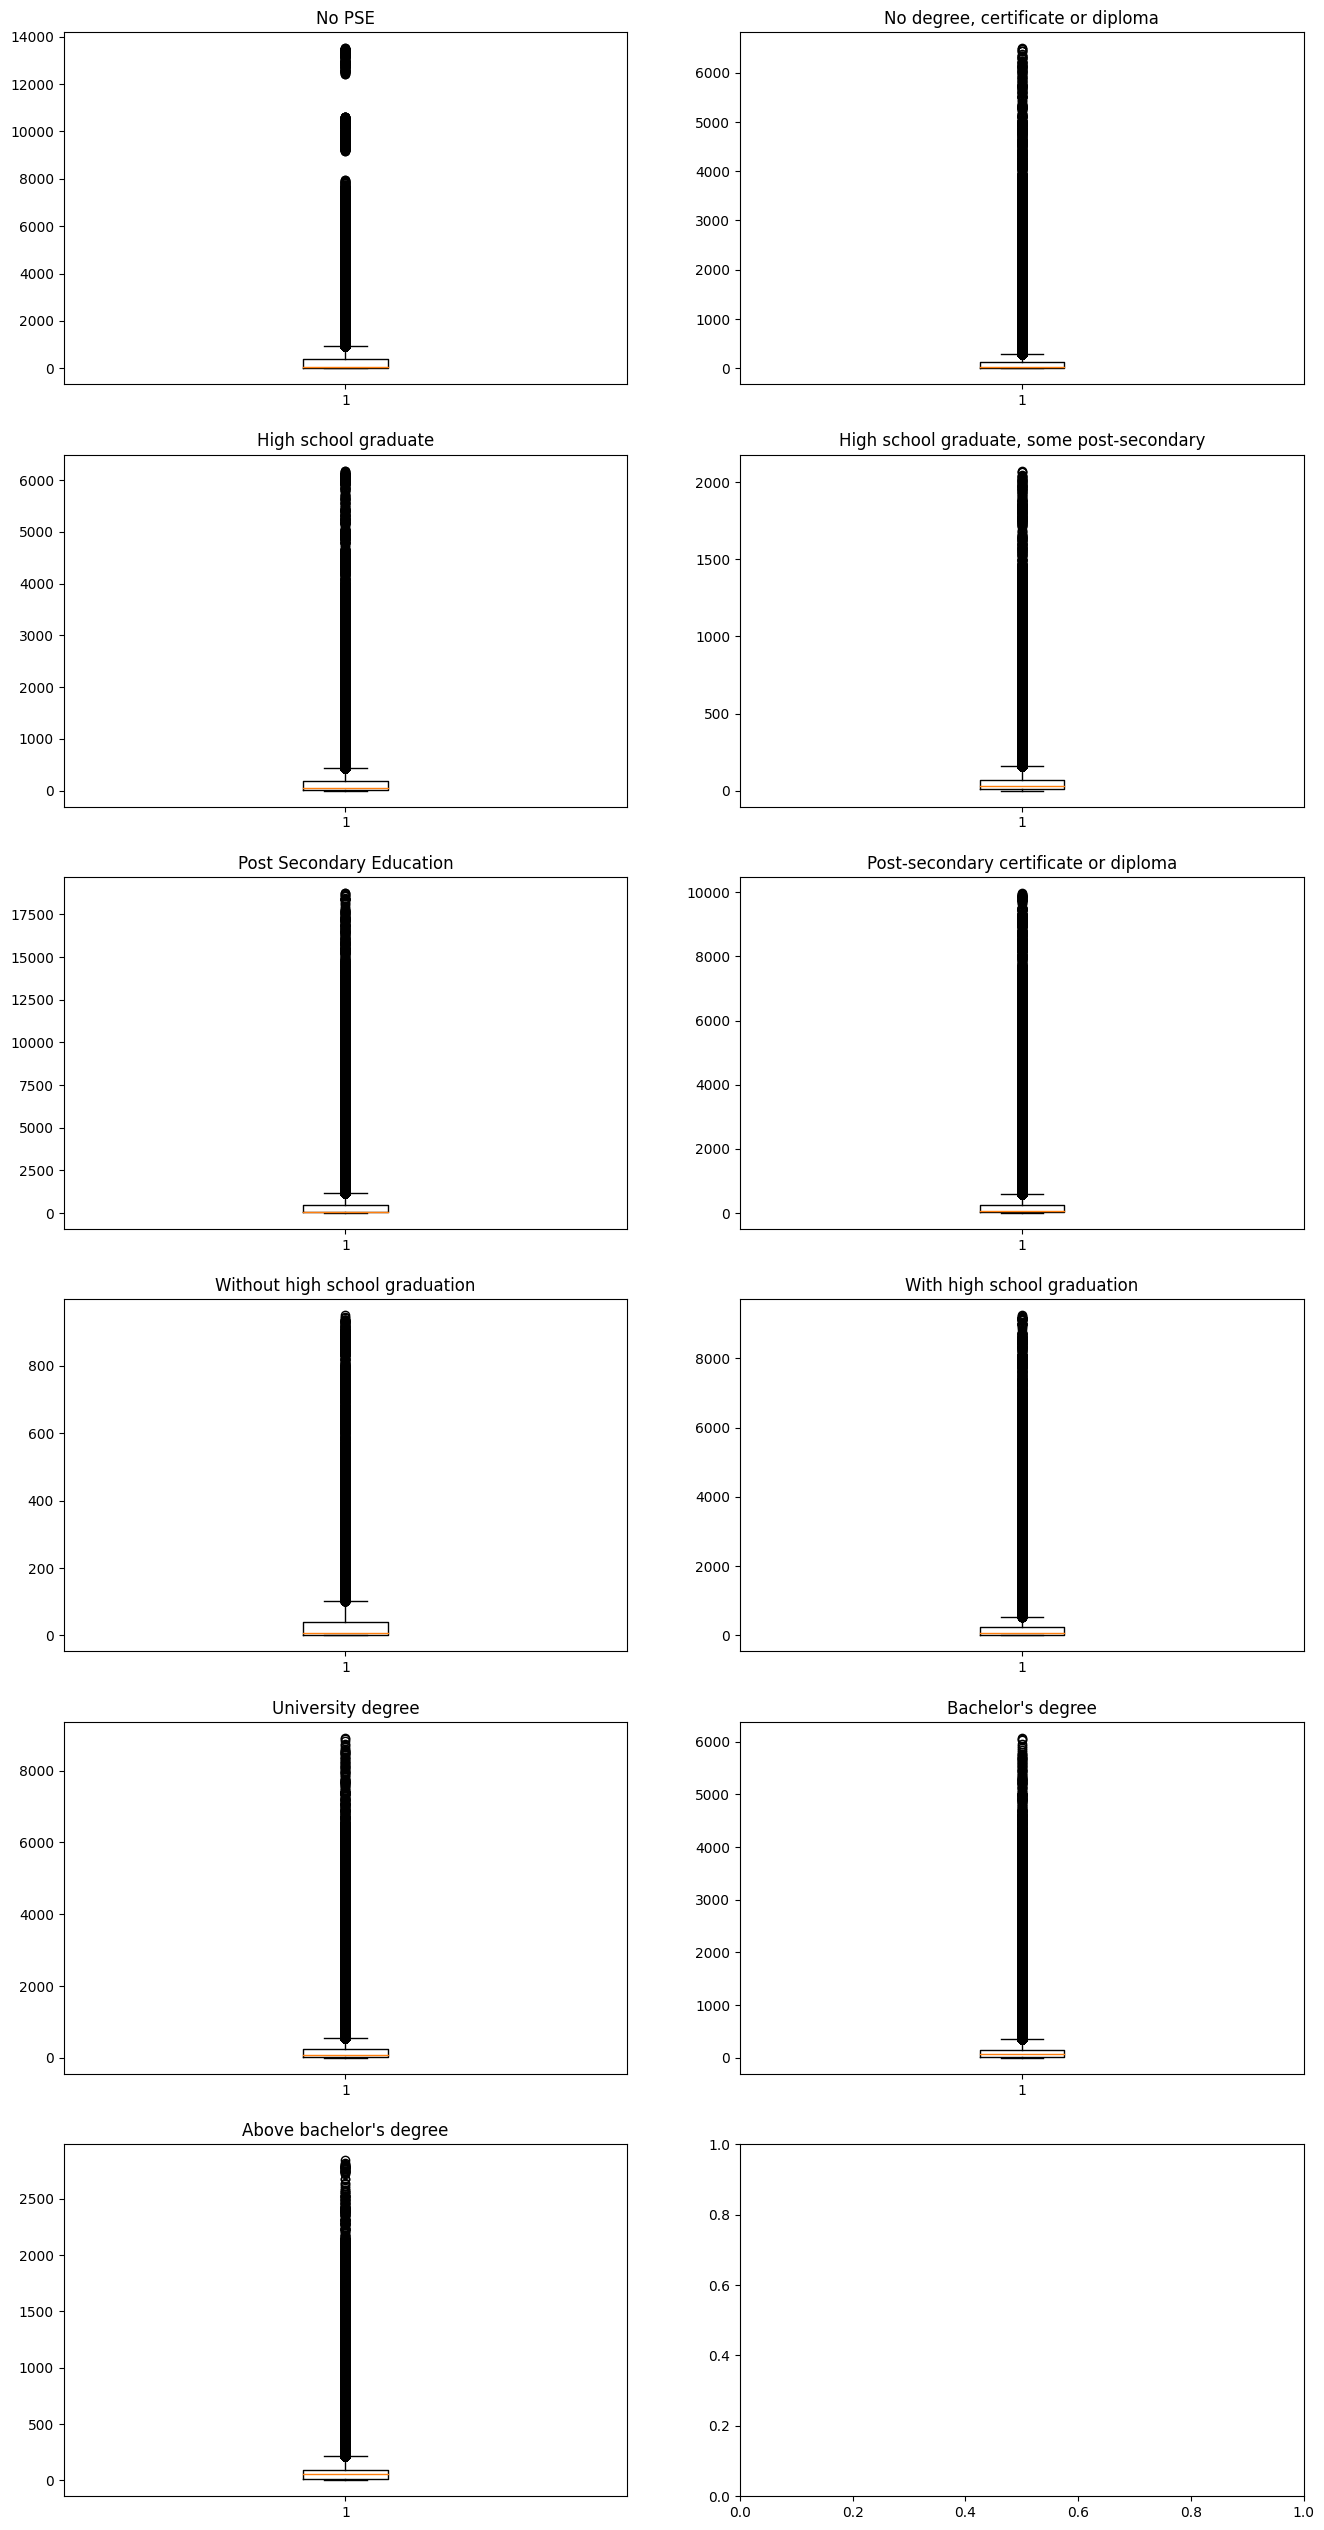

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 2, figsize=(16, 32))
#fig.suptitle('Education Levels')

axes[0, 0].set_title('No PSE')
axes[0, 0].boxplot(data_model['NPSE']);

axes[0, 1].set_title('No degree, certificate or diploma')
axes[0, 1].boxplot(data_model['NDCD']);

axes[1, 0].set_title('High school graduate')
axes[1, 0].boxplot(data_model['HSG']);

axes[1, 1].set_title('High school graduate, some post-secondary')
axes[1, 1].boxplot(data_model['HSGSPS']);

axes[2, 0].set_title('Post Secondary Education')
axes[2, 0].boxplot(data_model['  PSE']);

axes[2, 1].set_title('Post-secondary certificate or diploma')
axes[2, 1].boxplot(data_model['PSCOD']);

axes[3, 0].set_title('Without high school graduation')
axes[3, 0].boxplot(data_model['WOHSG']);

axes[3, 1].set_title('With high school graduation')
axes[3, 1].boxplot(data_model['WSHG']);

axes[4, 0].set_title('University degree')
axes[4, 0].boxplot(data_model['UD']);

axes[4, 1].set_title("Bachelor's degree")
axes[4, 1].boxplot(data_model['BD']);

axes[5, 0].set_title("Above bachelor's degree")
axes[5, 0].boxplot(data_model['ABD']);

**NOTE:** `plt.boxplot(DataFrame['Column'])` does not work when `DataFrame['Column']` has null values as part of data

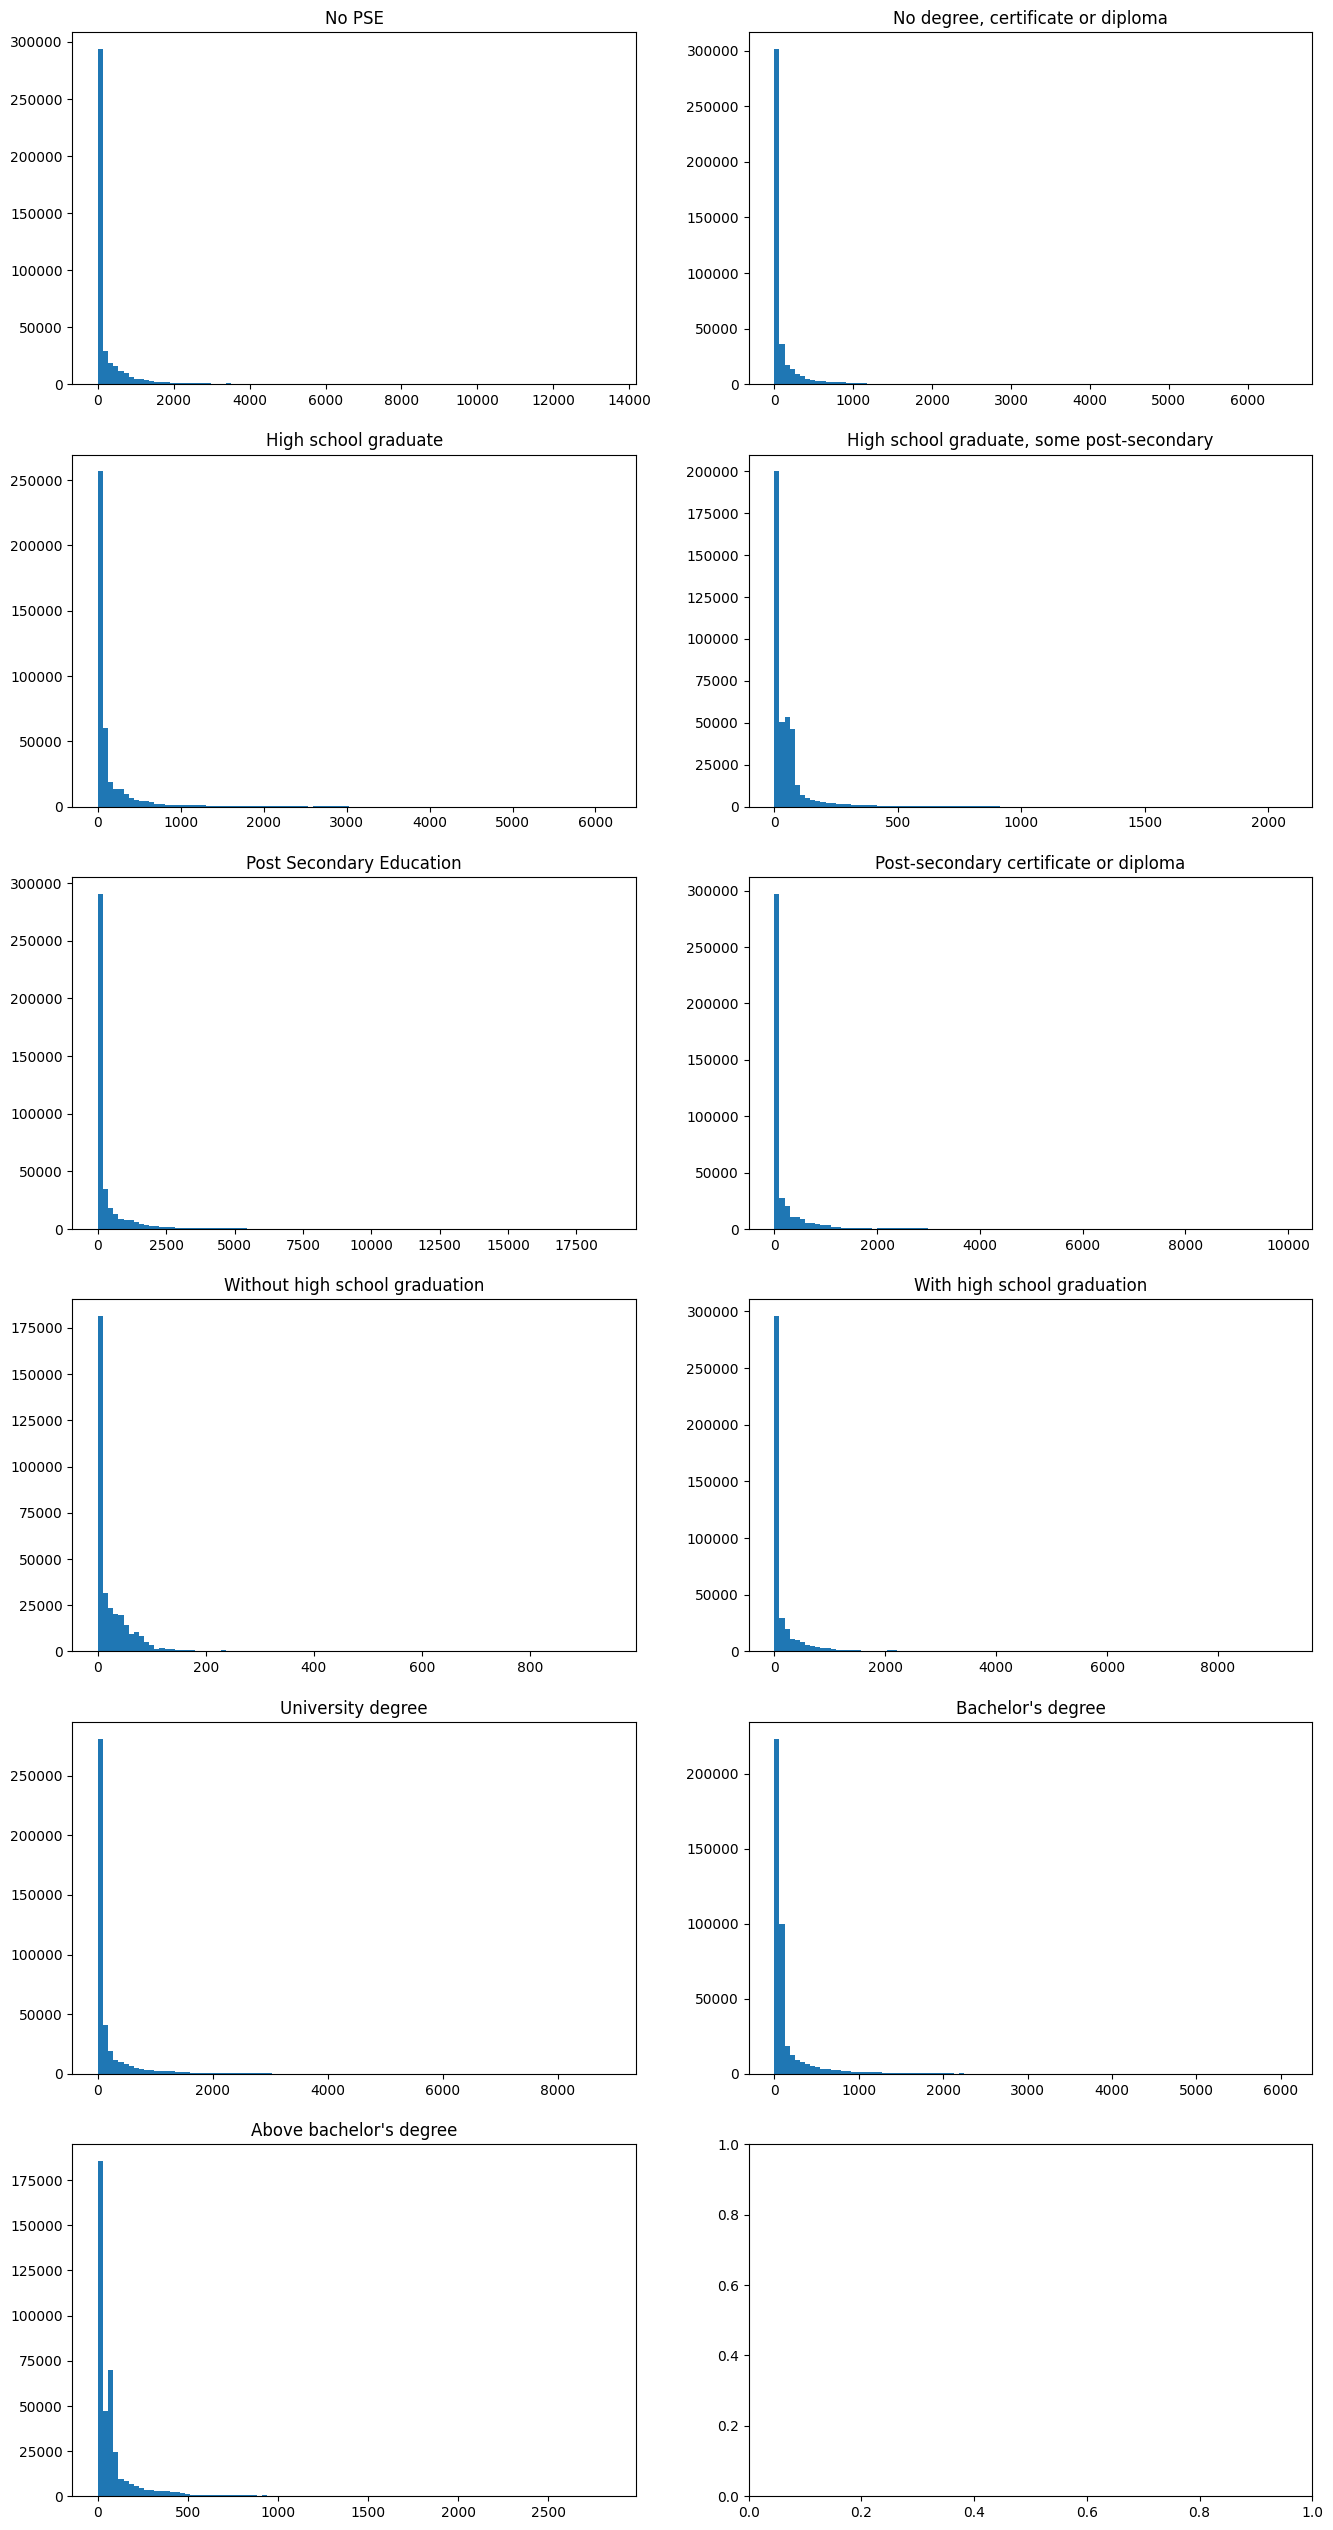

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(16, 32))
#fig.suptitle('Education Levels')

axes[0, 0].set_title('No PSE')
axes[0, 0].hist(df['NPSE'], bins=100);

axes[0, 1].set_title('No degree, certificate or diploma')
axes[0, 1].hist(df['NDCD'], bins=100);

axes[1, 0].set_title('High school graduate')
axes[1, 0].hist(df['HSG'], bins=100);

axes[1, 1].set_title('High school graduate, some post-secondary')
axes[1, 1].hist(df['HSGSPS'], bins=100);

axes[2, 0].set_title('Post Secondary Education')
axes[2, 0].hist(df['  PSE'], bins=100);

axes[2, 1].set_title('Post-secondary certificate or diploma')
axes[2, 1].hist(df['PSCOD'], bins=100);

axes[3, 0].set_title('Without high school graduation')
axes[3, 0].hist(df['WOHSG'], bins=100);

axes[3, 1].set_title('With high school graduation')
axes[3, 1].hist(df['WSHG'], bins=100);

axes[4, 0].set_title('University degree')
axes[4, 0].hist(df['UD'], bins=100);

axes[4, 1].set_title("Bachelor's degree")
axes[4, 1].hist(df['BD'], bins=100);

axes[5, 0].set_title("Above bachelor's degree")
axes[5, 0].hist(df['ABD'], bins=100);

In [ ]:
df.describe()

,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
count,424635.000000,423722.000000,420091.000000,421480.000000,408803.000000,423834.000000,421094.00000,348111.000000,420704.000000,421540.000000,419932.000000,400231.000000
mean,826.670135,336.296473,128.703813,173.860038,58.717478,504.313566,276.67236,33.292346,257.045368,244.594133,167.472381,95.396608
std,2134.591824,854.244290,338.252630,418.801371,122.135873,1318.815848,749.59378,70.205137,691.069940,580.088212,392.042030,190.930376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,18.700000,8.900000,10.300000,5.400000,17.800000,9.10000,0.000000,8.700000,10.900000,8.400000,4.700000
50%,78.400000,51.600000,26.600000,44.100000,22.300000,73.800000,59.60000,8.000000,58.300000,66.300000,52.400000,38.100000
75%,589.500000,244.300000,79.800000,121.200000,63.400000,316.600000,160.70000,40.300000,147.100000,160.300000,103.300000,84.500000
max,31250.500000,13511.200000,6495.800000,6179.600000,2073.900000,18741.500000,9971.70000,949.300000,9238.700000,8914.500000,6071.000000,2843.500000


Conclusions:
Seeing the histogram and the information provided, median seems to be the appropriate measure to impute.

In [ ]:
df['Month'].unique(), df['Immig'].unique(), df['Char'].unique(), df['Sex'].unique(), df['Age'].unique()

(array(['Mar-06', 'Apr-06', 'May-06', 'Jun-06', 'Jul-06', 'Aug-06',
        'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06', 'Jan-07', 'Feb-07',
        'Mar-07', 'Apr-07', 'May-07', 'Jun-07', 'Jul-07', 'Aug-07',
        'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07', 'Jan-08', 'Feb-08',
        'Mar-08', 'Apr-08', 'May-08', 'Jun-08', 'Jul-08', 'Aug-08',
        'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08', 'Jan-09', 'Feb-09',
        'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09',
        'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09', 'Jan-10', 'Feb-10',
        'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10',
        'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10', 'Jan-11', 'Feb-11',
        'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11',
        'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12',
        'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12',
        'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13',
        'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 

In [ ]:
df.drop(['Month','Prov'],axis=1, inplace=True)
df.head()

,Immig,Char,Sex,Age,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [ ]:
numeric_features = labels.copy()
del numeric_features[0]
numeric_features

['NPSE',
 'NDCD',
 'HSG',
 'HSGSPS',
 '  PSE',
 'PSCOD',
 'WOHSG',
 'WSHG',
 'UD',
 'BD',
 'ABD']

In [ ]:
for i in numeric_features:
  df[i].fillna(value=df[i].median(), inplace=True)
df.isna().sum()

Immig       0
Char        0
Sex         0
Age         0
Total     165
NPSE        0
NDCD        0
HSG         0
HSGSPS      0
  PSE       0
PSCOD       0
WOHSG       0
WSHG        0
UD          0
BD          0
ABD         0
dtype: int64

In [ ]:
missing_values = df['Total'].isna()
nan_index = []

for i in range(len(missing_values)):
  if missing_values[i]==True:
    nan_index.append(i)
nan_index[:5]

[3984, 4014, 4589, 4619, 6384]

In [ ]:
nan_total = pd.DataFrame(df, index=nan_index)
nan_total.drop(columns=['Immig','Char','Sex','Age','Total'],axis=1,inplace=True)
nan_total.head()

,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
3984,51.6,26.6,44.1,22.3,73.8,59.6,8.0,58.3,66.3,52.4,38.1
4014,51.6,26.6,44.1,22.3,73.8,59.6,8.0,58.3,66.3,52.4,38.1
4589,51.6,26.6,44.1,22.3,73.8,59.6,8.0,58.3,66.3,52.4,38.1
4619,51.6,26.6,44.1,22.3,73.8,59.6,8.0,58.3,66.3,52.4,38.1
6384,51.6,26.6,44.1,22.3,73.8,59.6,8.0,58.3,66.3,52.4,38.1


In [ ]:
len(nan_index)

165

In [ ]:
preds = model_2.predict(nan_total)
preds[:10]

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


array([60.613, 60.613, 60.613, 60.613, 60.613, 60.613, 60.613, 60.613,
       60.613, 60.613])

Final Data

In [ ]:
missing_values = ['-']
df_final_1 = pd.read_csv('BPFA_Assignment.csv',na_values=missing_values)
df_final_1.isna().sum()

Month         0
Prov          0
Immig         0
Char          0
Sex           0
Age           0
Total       165
NPSE       1078
NDCD       4709
HSG        3320
HSGSPS    15997
  PSE       966
PSCOD      3706
WOHSG     76689
WSHG       4096
UD         3260
BD         4868
ABD       24569
dtype: int64

In [ ]:
for i in numeric_features:
  df_final_1[i].fillna(value=df_final_1[i].median(), inplace=True)
df.isna().sum()

Immig       0
Char        0
Sex         0
Age         0
Total     165
NPSE        0
NDCD        0
HSG         0
HSGSPS      0
  PSE       0
PSCOD       0
WOHSG       0
WSHG        0
UD          0
BD          0
ABD         0
dtype: int64

In [ ]:
df_final_1.drop(index=nan_index, inplace=True)
df_final_1.isna().sum()

Month     0
Prov      0
Immig     0
Char      0
Sex       0
Age       0
Total     0
NPSE      0
NDCD      0
HSG       0
HSGSPS    0
  PSE     0
PSCOD     0
WOHSG     0
WSHG      0
UD        0
BD        0
ABD       0
dtype: int64

In [ ]:
df_final_1.drop(columns=['Month','Prov'],axis=1,inplace=True)
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424635 entries, 0 to 424799
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Immig   424635 non-null  object 
 1   Char    424635 non-null  object 
 2   Sex     424635 non-null  object 
 3   Age     424635 non-null  object 
 4   Total   424635 non-null  float64
 5   NPSE    424635 non-null  float64
 6   NDCD    424635 non-null  float64
 7   HSG     424635 non-null  float64
 8   HSGSPS  424635 non-null  float64
 9     PSE   424635 non-null  float64
 10  PSCOD   424635 non-null  float64
 11  WOHSG   424635 non-null  float64
 12  WSHG    424635 non-null  float64
 13  UD      424635 non-null  float64
 14  BD      424635 non-null  float64
 15  ABD     424635 non-null  float64
dtypes: float64(12), object(4)
memory usage: 55.1+ MB


In [ ]:
missing_values = ['-']
df_sample = pd.read_csv('BPFA_Assignment.csv',na_values=missing_values)
df_final_2 = pd.DataFrame(df, index=nan_index)
df_final_2.isna().sum()

Immig       0
Char        0
Sex         0
Age         0
Total     165
NPSE        0
NDCD        0
HSG         0
HSGSPS      0
  PSE       0
PSCOD       0
WOHSG       0
WSHG        0
UD          0
BD          0
ABD         0
dtype: int64

In [ ]:
df_final_2.drop('Total',axis=1,inplace=True)
df_final_2['Total'] = preds

In [ ]:
df_final_2.isna().sum()

Immig     0
Char      0
Sex       0
Age       0
NPSE      0
NDCD      0
HSG       0
HSGSPS    0
  PSE     0
PSCOD     0
WOHSG     0
WSHG      0
UD        0
BD        0
ABD       0
Total     0
dtype: int64

In [ ]:
final = pd.concat([df_final_1, df_final_2], axis=0)
len(final)

424800

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424800 entries, 0 to 419814
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Immig   424800 non-null  object 
 1   Char    424800 non-null  object 
 2   Sex     424800 non-null  object 
 3   Age     424800 non-null  object 
 4   Total   424800 non-null  float64
 5   NPSE    424800 non-null  float64
 6   NDCD    424800 non-null  float64
 7   HSG     424800 non-null  float64
 8   HSGSPS  424800 non-null  float64
 9     PSE   424800 non-null  float64
 10  PSCOD   424800 non-null  float64
 11  WOHSG   424800 non-null  float64
 12  WSHG    424800 non-null  float64
 13  UD      424800 non-null  float64
 14  BD      424800 non-null  float64
 15  ABD     424800 non-null  float64
dtypes: float64(12), object(4)
memory usage: 55.1+ MB


In [ ]:
final.isna().sum()

Immig     0
Char      0
Sex       0
Age       0
Total     0
NPSE      0
NDCD      0
HSG       0
HSGSPS    0
  PSE     0
PSCOD     0
WOHSG     0
WSHG      0
UD        0
BD        0
ABD       0
dtype: int64

In [ ]:
final.head()

,Immig,Char,Sex,Age,Total,NPSE,NDCD,HSG,HSGSPS,PSE,PSCOD,WOHSG,WSHG,UD,BD,ABD
0,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [ ]:
final.to_csv('BPFA_Final_Dataset.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('BPFA_Final_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424800 entries, 0 to 424799
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Immig   424800 non-null  object 
 1   Char    424800 non-null  object 
 2   Sex     424800 non-null  object 
 3   Age     424800 non-null  object 
 4   Total   424800 non-null  float64
 5   NPSE    424800 non-null  float64
 6   NDCD    424800 non-null  float64
 7   HSG     424800 non-null  float64
 8   HSGSPS  424800 non-null  float64
 9     PSE   424800 non-null  float64
 10  PSCOD   424800 non-null  float64
 11  WOHSG   424800 non-null  float64
 12  WSHG    424800 non-null  float64
 13  UD      424800 non-null  float64
 14  BD      424800 non-null  float64
 15  ABD     424800 non-null  float64
dtypes: float64(12), object(4)
memory usage: 51.9+ MB


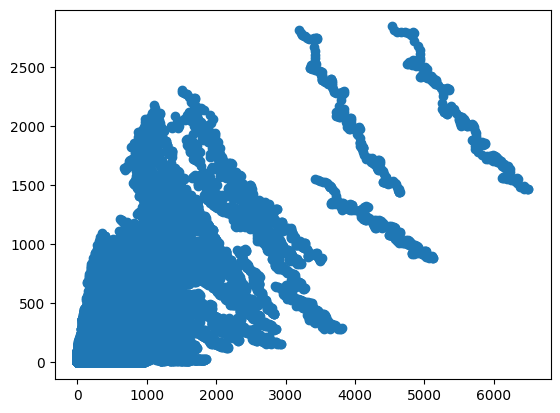

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['NDCD'],df['ABD'], color=[])

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select features for clustering (e.g., Annual Income and Spending Score)
X = df[['NDCD', 'ABD']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.74


Text(0.5, 1.0, 'K-Means Clustering')

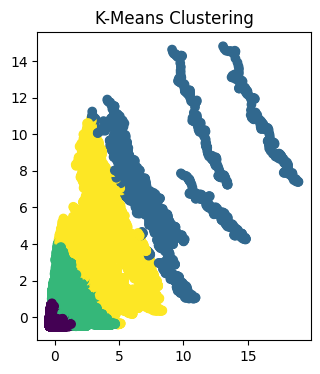

In [ ]:
# Initialize clustering models
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the models to the data
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering using Silhouette Score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")


# Plot the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.78


Text(0.5, 1.0, 'K-Means Clustering')

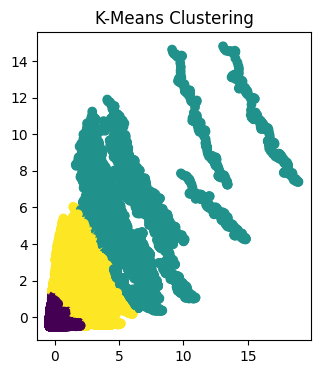

In [ ]:
# Initialize clustering models
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the models to the data
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering using Silhouette Score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")


# Plot the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.85


Text(0.5, 1.0, 'K-Means Clustering')

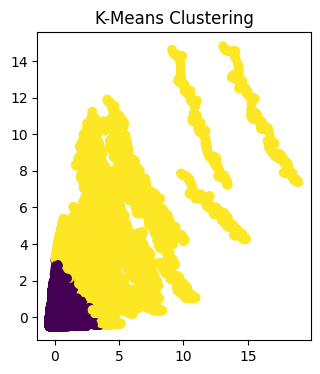

In [ ]:
# Initialize clustering models
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the models to the data
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering using Silhouette Score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")


# Plot the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# categorical_features = ['Immig','Char','Sex','Age']
# categorical_transformer = Pipeline(steps=[
#     ("impute",SimpleImputer(strategy='median')),
#     ("onehot", OneHotEncoder(handle_unknown="ignore"))
# ])

# preprocessing = ColumnTransformer(transformers=[
#     ("cat", categorical_transformer, categorical_features)
# ])